Feature ranking:
1. Feature 'Weight': 0.46034838134958905
2. Feature 'Height': 0.2244381476198889
3. Feature 'Gender_Male': 0.15819324294792025
4. Feature 'Age': 0.05304072020236779
5. Feature 'CALC_no': 0.02606415546518953
6. Feature 'FAVC_yes': 0.020954834375068686
7. Feature 'FCVC': 0.012744093280855198
8. Feature 'CAEC_Always': 0.00780408267123466
9. Feature 'Gender_Female': 0.007085186480044891
10. Feature 'NCP': 0.005059431200953287
11. Feature 'MTRANS_Automobile': 0.004988717872766112
12. Feature 'FAF': 0.004028369711410468
13. Feature 'TUE': 0.003296443409981575
14. Feature 'CAEC_Sometimes': 0.0026131995469697612
15. Feature 'family_history_with_overweight_yes': 0.002037525784503454
16. Feature 'CAEC_Frequently': 0.0018009746862855578
17. Feature 'CH2O': 0.001653086957238653
18. Feature 'MTRANS_Bike': 0.0012935989636649586
19. Feature 'MTRANS_Motorbike': 0.0012109823058841281
20. Feature 'SCC_no': 0.000922653185435526
21. Feature 'FAVC_no': 0.0004221719827476029
22. Feature 'MT

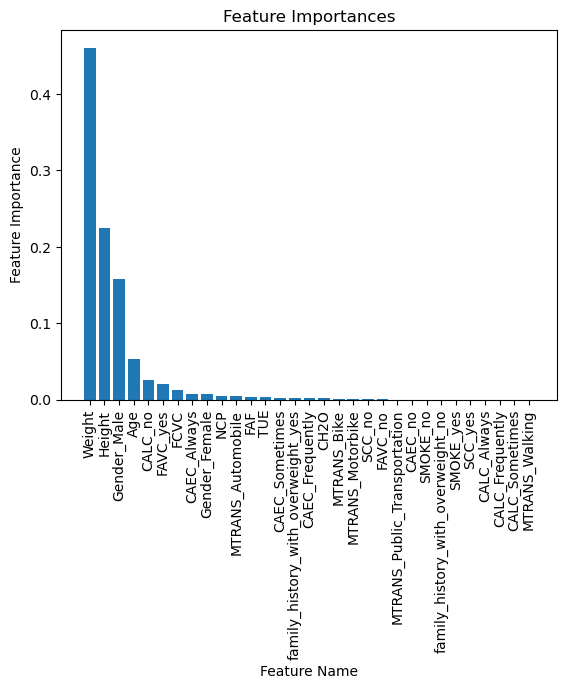

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

columns_to_encode = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC','MTRANS']

# Select the columns to encode
df_to_encode = data[columns_to_encode]

other_columns = data.drop(columns_to_encode, axis=1)

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoded DataFrame
encoded_array = encoder.fit_transform(df_to_encode)

# Convert the encoded array back to a DataFrame
df_encoded_onehot = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(df_to_encode.columns))

df_final = pd.concat([other_columns, df_encoded_onehot], axis=1)

column_to_move = df_final.pop('NObeyesdad')

# Reinsert the column at the end
df_final['NObeyesdad'] = column_to_move

# Custom mapping for target class (obesity level)
feature_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6,
}

df_final['NObeyesdad'] = df_final['NObeyesdad'].map(feature_mapping)

X = df_final.drop('NObeyesdad', axis=1)     # Features
y = df_final['NObeyesdad']                  # Target variable

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=462)


clf = DecisionTreeClassifier()

# Train the decision tree model
clf.fit(X_train, y_train)

# Get feature importances and feature names
importances = clf.feature_importances_
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature '{feature_names[indices[f]]}': {importances[indices[f]]}")

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Feature Importance")
plt.show()






In [2]:
columns_to_use = ['Weight','Height','Gender','Age','CALC','FAVC','FCVC','MTRANS','NObeyesdad']

extracted_df = data[columns_to_use]


one_hot_encoded_columns = ['CALC','MTRANS','FAVC']
word_embedded_columns = ['Gender']

df_to_encode = extracted_df[one_hot_encoded_columns]

other_columns = extracted_df.drop(one_hot_encoded_columns, axis=1)

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the encoded DataFrame
encoded_array = encoder.fit_transform(df_to_encode)

# Convert the encoded array back to a DataFrame
df_encoded_onehot = pd.DataFrame(encoded_array.toarray(), columns=encoder.get_feature_names_out(df_to_encode.columns))

df_encoded_onehot = pd.concat([other_columns, df_encoded_onehot], axis=1)

column_to_move = df_encoded_onehot.pop('NObeyesdad')

#Reinsert the column at the end
df_encoded_onehot['NObeyesdad'] = column_to_move

feature_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6,
}

df_encoded_onehot['NObeyesdad'] = df_encoded_onehot['NObeyesdad'].map(feature_mapping)

X = df_encoded_onehot.drop('NObeyesdad', axis=1)     # Features
y = df_encoded_onehot['NObeyesdad']                  # Target variable

# split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=462)

min_vals = X_train.min()
max_vals = X_train.max()

column_to_be_normalized = ['Age','Height','Weight','FCVC']

for col in X_train:
    if col in column_to_be_normalized:
        X_test[col] = (X_test[col] - min_vals[col]) / (max_vals[col] - min_vals[col])
        X_train[col] = (X_train[col] - min_vals[col]) / (max_vals[col] - min_vals[col])

In [3]:
import torch
from torchtext.vocab import GloVe
from sklearn.manifold import TSNE
import random
from ANN import ArtificialNeuralNetwork

# Load pre-trained Word2Vec embeddings(GloVe)
word_embeddings = GloVe(name='6B', dim=100)

def replace_gender_with_vectors(value,value_dict):
    if value == 'Male':
        return value_dict['Male']
    elif value == 'Female':
        return value_dict['Female']
    else:
        return None  # Handle other cases if necessary

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from ANN import ArtificialNeuralNetwork


value_dict = {}
for col in word_embedded_columns:
    for col_values in X_train[col].unique():
        value_dict[col_values] = word_embeddings[col_values.lower()].numpy()

gender_column_train = X_train['Gender'].map(value_dict).values.tolist()
gender_column_test = X_test['Gender'].map(value_dict).values.tolist()

gender_train_dataset = pd.DataFrame()
gender_test_dataset = pd.DataFrame()

for i in range(100):
    gender_train_dataset["Gender" + str(i)]  = [column[i] for column in gender_column_train]
    gender_test_dataset["Gender" + str(i)]  = [column[i] for column in gender_column_test]

X_train.drop("Gender",axis=1,inplace=True)
X_test.drop("Gender",axis=1,inplace=True)



X_train = pd.concat([X_train.reset_index(drop=True),gender_train_dataset],axis=1)
X_test = pd.concat([X_test.reset_index(drop=True),gender_test_dataset],axis=1)


X_train_tensor = torch.tensor(X_train.values.astype(np.float32))
X_test_tensor = torch.tensor(X_test.values.astype(np.float32))
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

input_size = X_train_tensor.shape[1]
hidden_sizes = [64,64,64]               # hidden layer size is hyperparameter
output_size = len(y.unique())

model = ArtificialNeuralNetwork(input_size, hidden_sizes, output_size)

criterion = nn.CrossEntropyLoss()                       # cross entropy value is used as loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)    # learning rate is hyperparameter

num_epochs = 1000

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()               # clears the gradients before new back prop (new batch)
        outputs = model.forward(inputs)     # feed model with forward prop (get predictions - outputs)
        loss = criterion(outputs, labels)   # calculate loss value of predictions
        loss.backward()                     # perform back prop to compute gradient w.r.t model params
        optimizer.step()                    # update the model params (weights) according to LR and gradient

    print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

with torch.no_grad():
    model.eval()
    outputs = model.forward(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)

print(f"\nTest Accuracy: {accuracy:.4f}")

Epoch [1/1000], Loss: 1.8865
Epoch [2/1000], Loss: 1.7079
Epoch [3/1000], Loss: 1.5728
Epoch [4/1000], Loss: 1.5639
Epoch [5/1000], Loss: 1.6052
Epoch [6/1000], Loss: 1.4187
Epoch [7/1000], Loss: 1.1521
Epoch [8/1000], Loss: 1.3699
Epoch [9/1000], Loss: 1.4299
Epoch [10/1000], Loss: 1.3732
Epoch [11/1000], Loss: 1.2666
Epoch [12/1000], Loss: 1.0739
Epoch [13/1000], Loss: 1.0721
Epoch [14/1000], Loss: 1.1562
Epoch [15/1000], Loss: 1.3782
Epoch [16/1000], Loss: 1.2597
Epoch [17/1000], Loss: 0.6111
Epoch [18/1000], Loss: 0.7366
Epoch [19/1000], Loss: 0.6055
Epoch [20/1000], Loss: 0.5001
Epoch [21/1000], Loss: 0.5869
Epoch [22/1000], Loss: 0.7984
Epoch [23/1000], Loss: 0.5446
Epoch [24/1000], Loss: 0.5761
Epoch [25/1000], Loss: 0.5874
Epoch [26/1000], Loss: 0.5249
Epoch [27/1000], Loss: 0.3399
Epoch [28/1000], Loss: 0.4517
Epoch [29/1000], Loss: 0.3719
Epoch [30/1000], Loss: 0.3730
Epoch [31/1000], Loss: 0.2663
Epoch [32/1000], Loss: 0.4558
Epoch [33/1000], Loss: 0.2714
Epoch [34/1000], Lo